Mounting Google Drive to import relevent dataset.

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("diabetes.csv")

In [15]:
df.head() 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.shape 


(768, 9)

In [19]:
df.columns 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
df.dtypes 



Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [23]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.describe() 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.*

In [28]:
df=df.drop_duplicates()


In [30]:
df.isnull().sum() 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Conclusion* :- there are no null values in this dataset

In [33]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])


35
5
227
374
11


*Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.*

In [36]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution


<Axes: xlabel='Outcome', ylabel='count'>

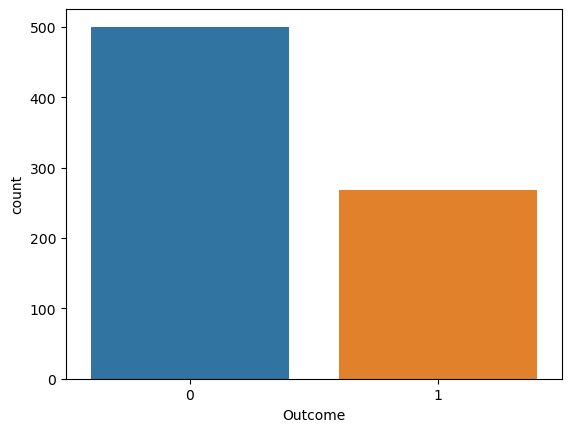

In [38]:
sns.countplot(x='Outcome', data=df)


Conclusion :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

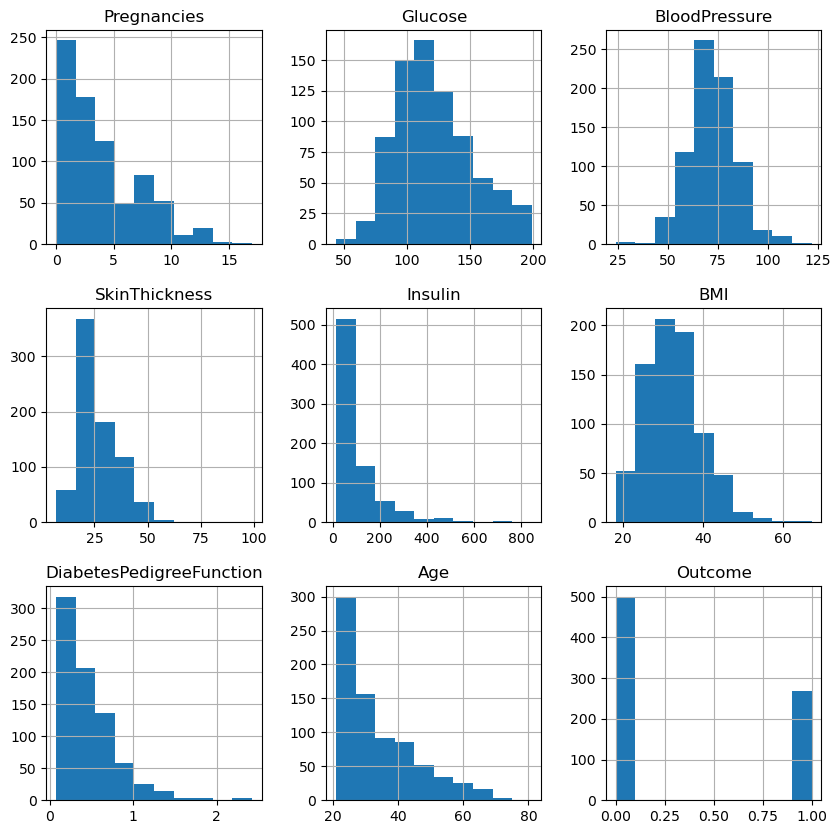

In [41]:
df.hist(bins=10,figsize=(10,10))
plt.show()


Conclusion :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<Axes: xlabel='DiabetesPedigreeFunction'>

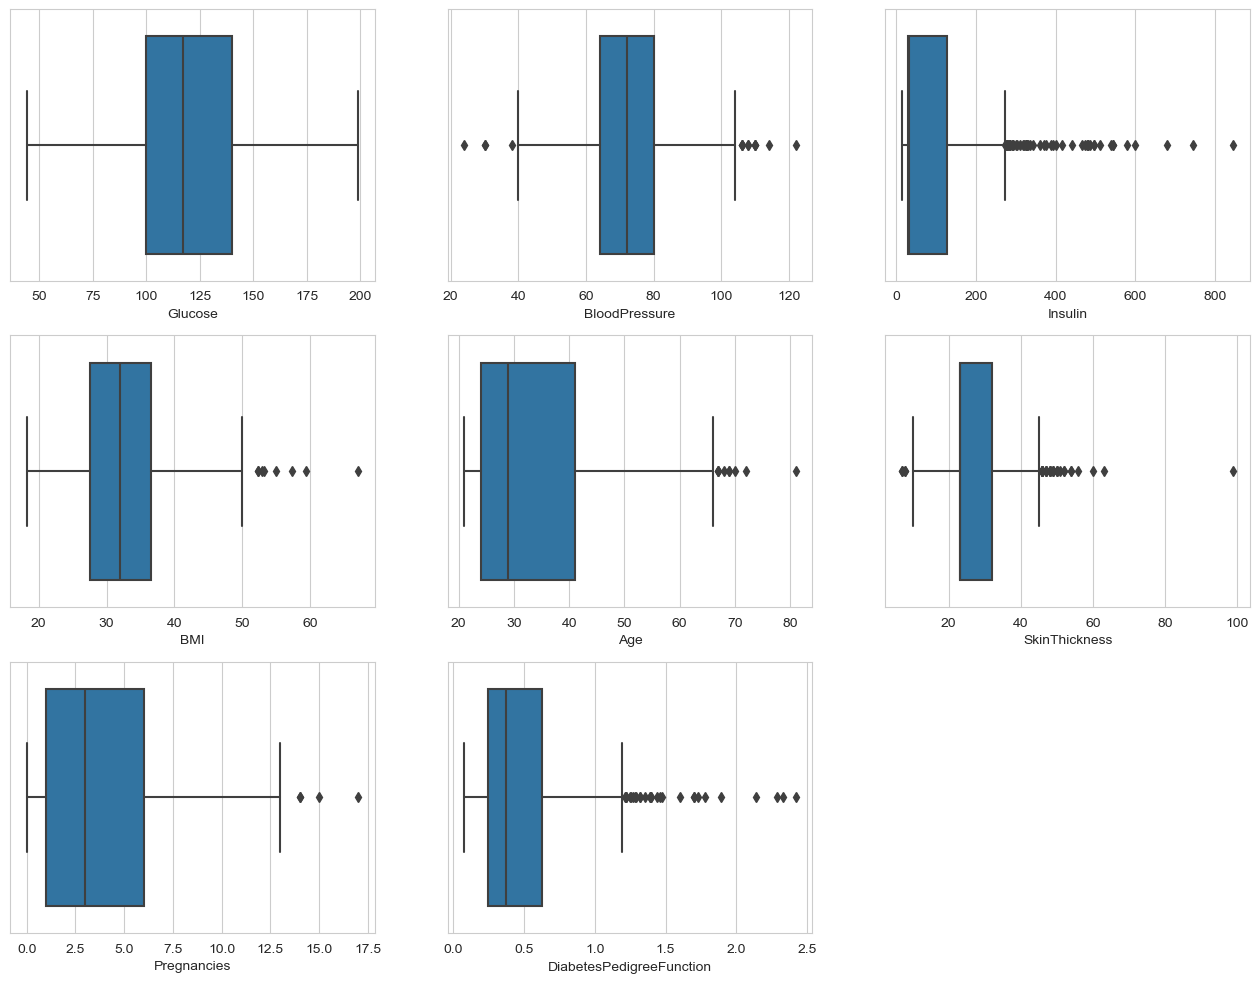

In [43]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

Outliers are unusual values in our dataset, and they can distort statistical analyses and violate their assumptions. Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques.

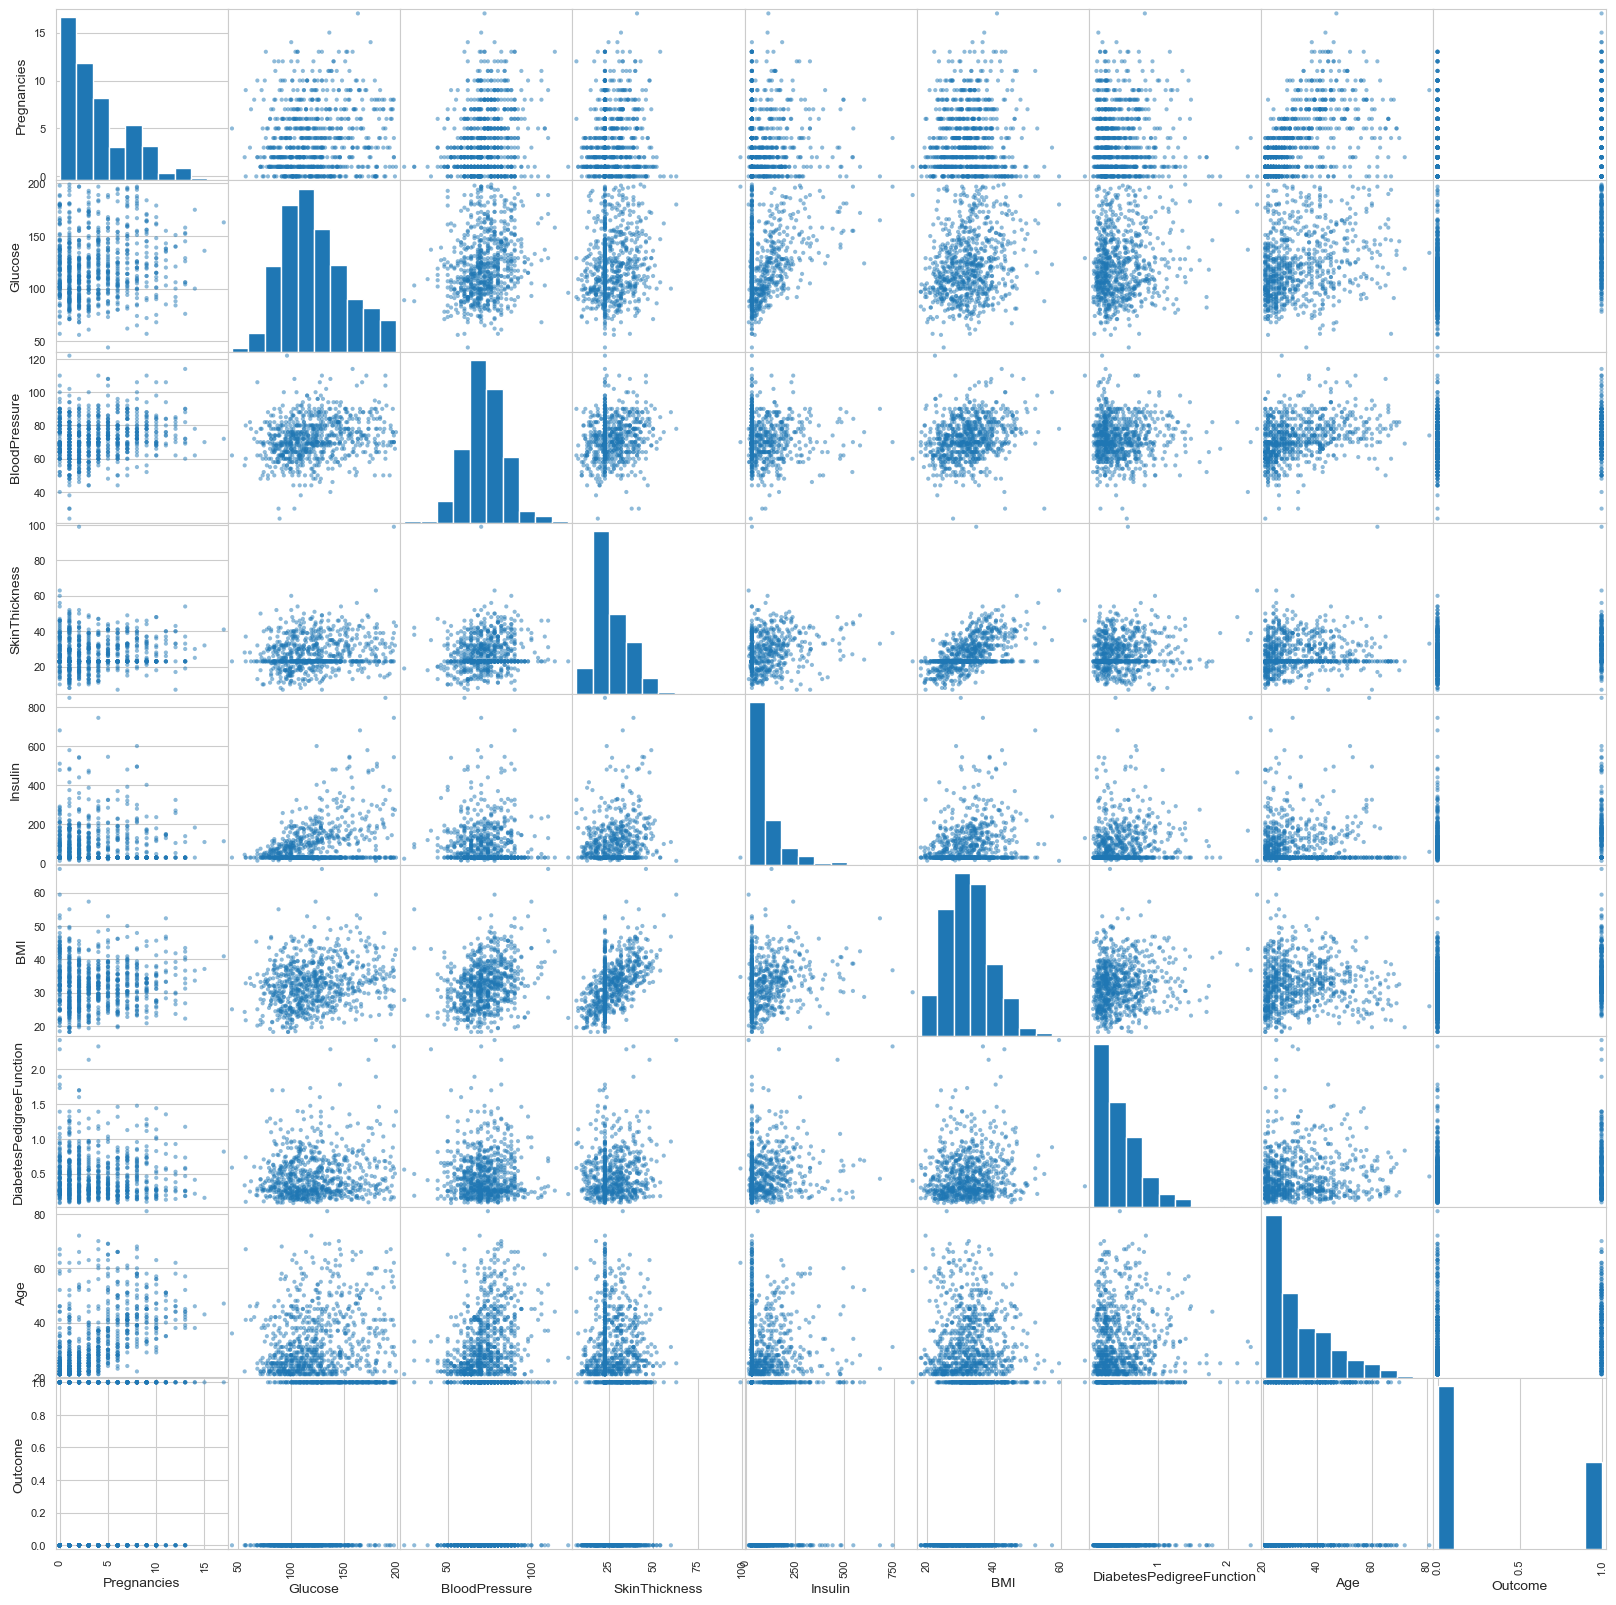

In [45]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));


In [47]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: >

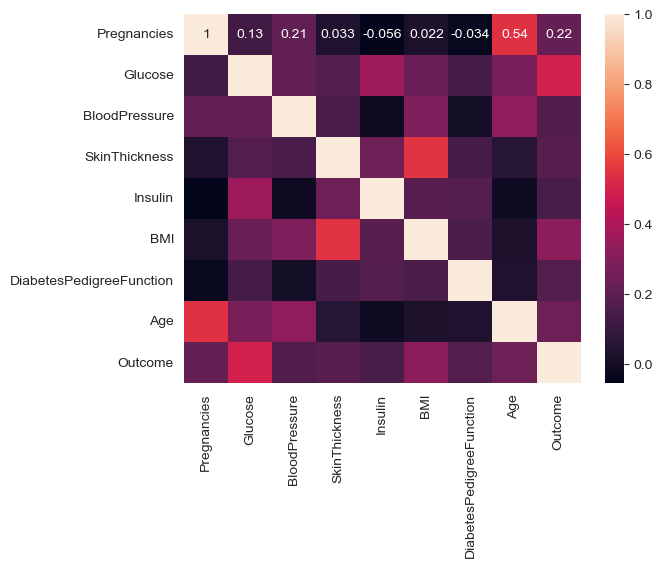

In [48]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)


CONCLUSION :- While observing the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them.

In [50]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [51]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

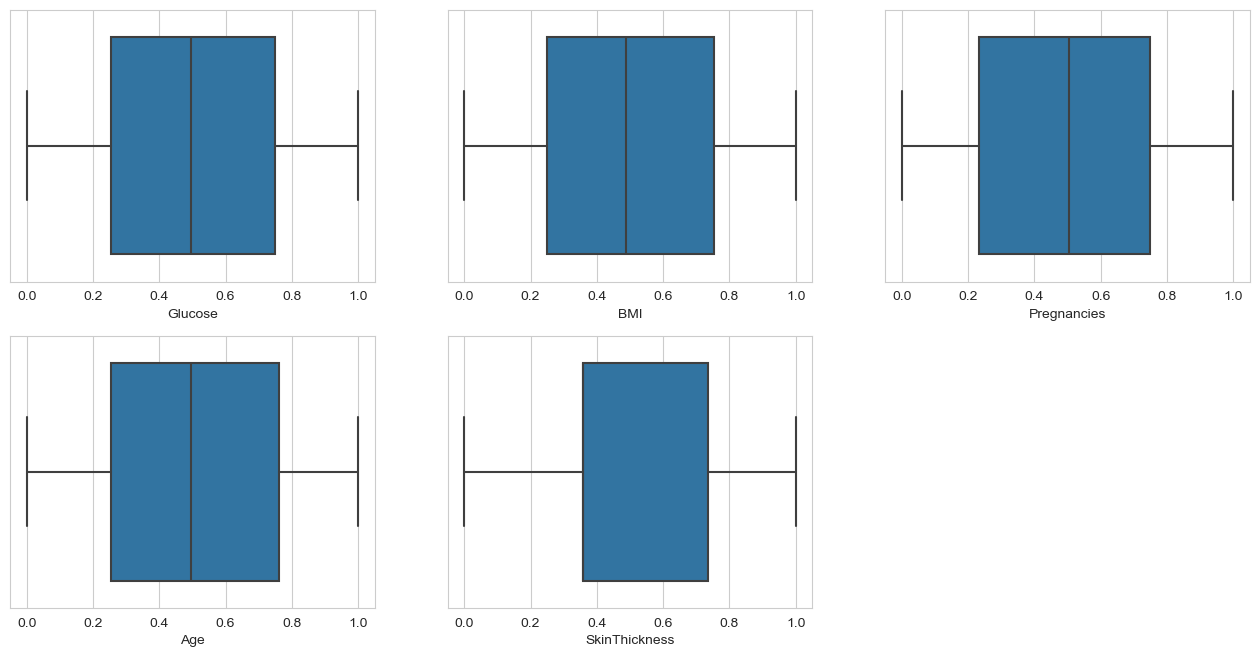

In [53]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

In [54]:
target_name='Outcome'
y= df_new[target_name] 
X=df_new.drop(target_name,axis=1)

In [55]:
X.head() 

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [56]:
y.head() 

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)


In [58]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [59]:
print(X)

     Pregnancies   Glucose  SkinThickness       BMI       Age
0       0.747718  0.810300       0.801825  0.591265  0.889831
1       0.232725  0.091265       0.644720  0.213168  0.558670
2       0.863755  0.956975       0.357888  0.077575  0.585398
3       0.232725  0.124511       0.357888  0.284224  0.000000
4       0.000000  0.721643       0.801825  0.926988  0.606258
..           ...       ...            ...       ...       ...
763     0.940678  0.278357       0.978488  0.552803  0.976532
764     0.387223  0.561930       0.591917  0.760756  0.411995
765     0.677966  0.549544       0.357888  0.198827  0.529335
766     0.232725  0.619948       0.357888  0.385919  0.867014
767     0.232725  0.170795       0.702738  0.398957  0.200130

[768 rows x 5 columns]


In [60]:
print(y)

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64


In [61]:
X_test.shape,y_test.shape

((154, 5), (154,))

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(768, 5) (614, 5) (154, 5)


## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

In [66]:

knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier. Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models.

In [72]:
best_model_knn = grid_search.fit(X_train,y_train)

In [73]:
print(best_model_knn)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1')


In [74]:

knn_pred = best_model_knn.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<Axes: >

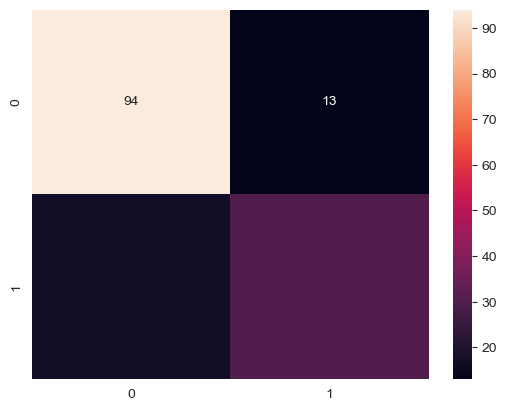

In [75]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True)

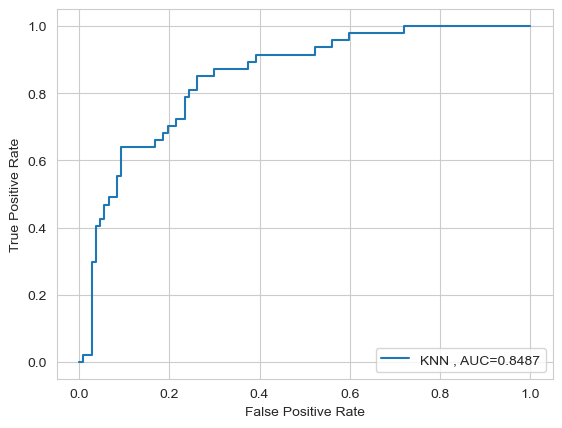

In [77]:
#setting up plotting area
plt.figure(0).clf()

#fit KNN and plot ROC curve
y_pred = best_model_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN , AUC="+str(auc))

#add legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

##  Naive Bayes :-

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb_model = GaussianNB()

In [87]:
best_model_naive= nb_model.fit(X_train, y_train)

In [91]:
nb_pred=best_model_naive.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       107
         1.0       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154


 F1:
 0.6326530612244897

 Precision score is:
 0.6078431372549019

 Recall score is:
 0.6595744680851063

 Confusion Matrix:



<Axes: >

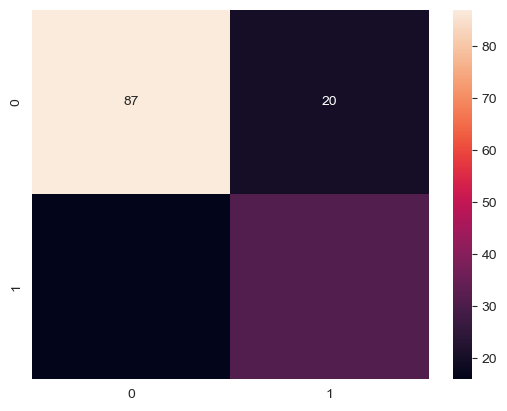

In [93]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True)

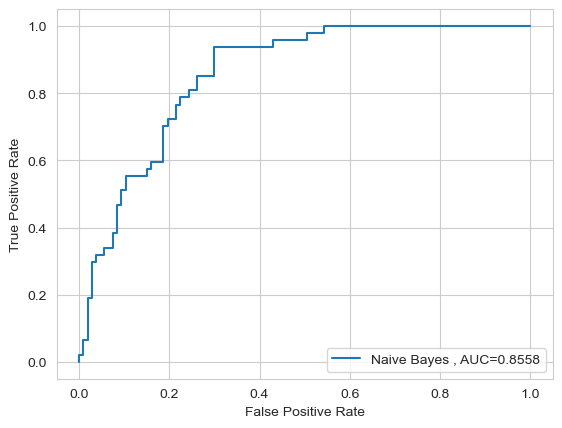

In [95]:

plt.figure(0).clf()

y_pred = best_model_naive.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes , AUC="+str(auc))

#add legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

##  Support Vector Machine :-

In [97]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.calibration import CalibratedClassifierCV

In [98]:
svm_model = SVC(probability=True)

In [99]:
svm = svm_model.fit(X_train, y_train)

In [100]:
svm_pred=svm.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       107
         1.0       0.65      0.55      0.60        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154


 F1:
 0.5977011494252874

 Precision score is:
 0.65

 Recall score is:
 0.5531914893617021

 Confusion Matrix:



<Axes: >

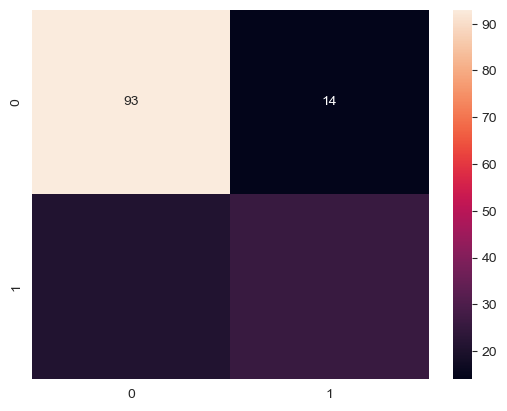

In [101]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,svm_pred))
print("\n Precision score is:\n",precision_score(y_test,svm_pred))
print("\n Recall score is:\n",recall_score(y_test,svm_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True)

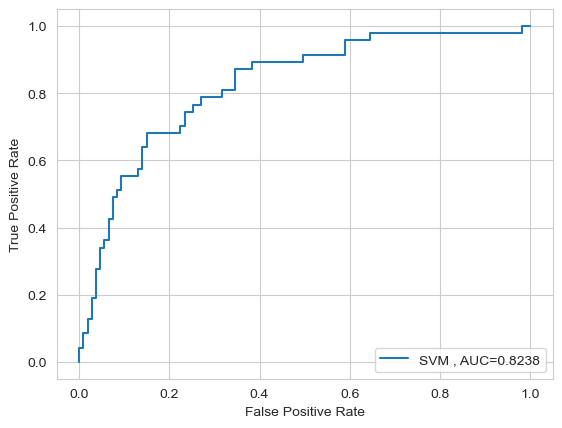

In [102]:

plt.figure(0).clf()

y_pred = svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM , AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

##  Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [105]:

params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [106]:
grid_search_Decision_tree = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [107]:
best_model_dec_tree=grid_search_Decision_tree.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [108]:
dt_pred=best_model_dec_tree.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<Axes: >

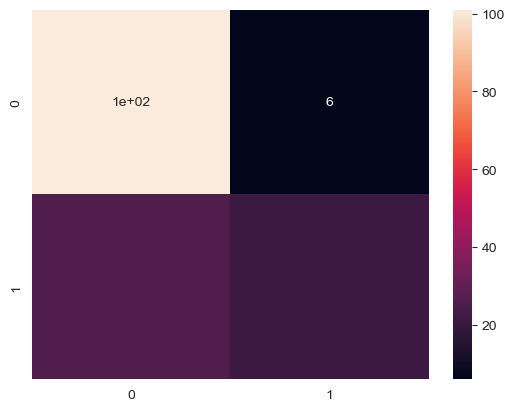

In [109]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)

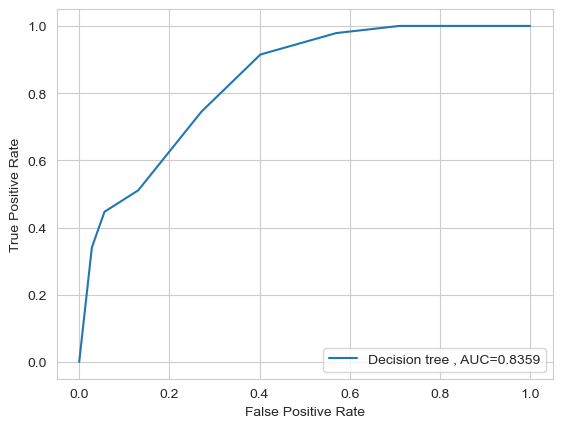

In [110]:
#setting up plotting area
plt.figure(0).clf()

#fit decision tree and plot ROC curve
y_pred = best_model_dec_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision tree , AUC="+str(auc))

#add legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

## Random Forest :-


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [113]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [114]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [115]:
best_model_random_forest = grid_search.fit(X_train, y_train)

In [116]:
rf_pred=best_model_random_forest.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       107
         1.0       0.65      0.68      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6530612244897959

 Recall score is:
 0.6808510638297872

 Confusion Matrix:



<Axes: >

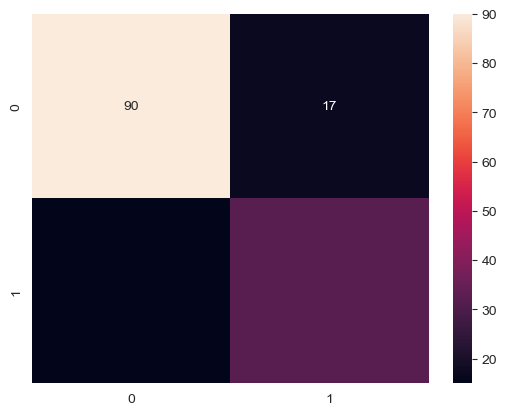

In [167]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,rf_pred))
print("\n Precision score is:\n",precision_score(y_test,rf_pred))
print("\n Recall score is:\n",recall_score(y_test,rf_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)

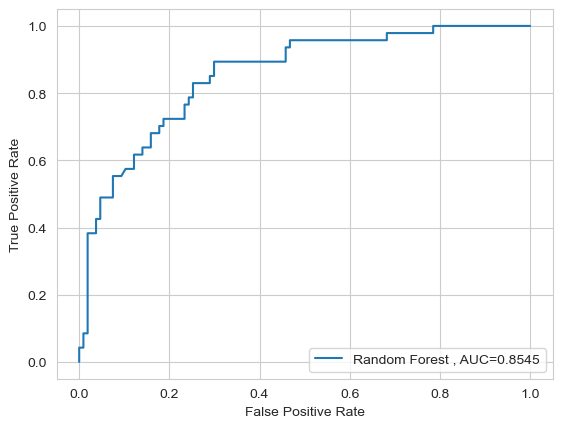

In [162]:

plt.figure(0).clf()


y_pred = best_model_random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(auc))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

## Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [121]:
reg = LogisticRegression()
reg.fit(X_train,y_train) 

LogisticRegression()

In [122]:
lr_pred=reg.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.627906976744186

 Precision score is:
 0.6923076923076923

 Recall score is:
 0.574468085106383

 Confusion Matrix:



<Axes: >

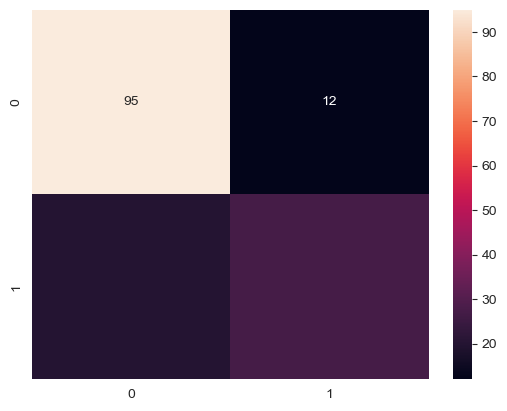

In [123]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred), annot=True)

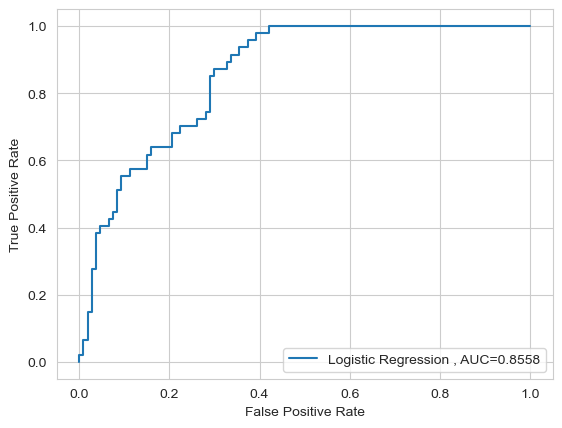

In [124]:

plt.figure(0).clf()

y_pred = reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression , AUC="+str(auc))

#add legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)


In [125]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('clf1',reg),('clf2',best_model_knn),('clf3',best_model_dec_tree),('clf4',best_model_random_forest),('clf5',svm),('clf6',best_model_naive)],voting='soft')

In [126]:
eclf.fit(X_train,y_train.ravel())

Fitting 4 folds for each of 40 candidates, totalling 160 fits


VotingClassifier(estimators=[('clf1', LogisticRegression()),
                             ('clf2',
                              GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                                           error_score=0,
                                           estimator=KNeighborsClassifier(),
                                           n_jobs=-1,
                                           param_grid={'metric': ['euclidean',
                                                                  'manhattan',
                                                                  'minkowski'],
                                                       'n_neighbors': [15, 16,
                                                                       17, 18,
                                                                       19, 20,
                                                                       21, 22,
                                                                       23, 24],
                                                       'p': [1, 2],
                                                       'weights': ['uniform',
                                                                   'distance'...
                                                       'min_samples_leaf': [10,
                                                                            20,
                                                                            50,
                                                                            100,
                                                                            120]},
                                           scoring='accuracy', verbose=1)),
                             ('clf4',
                              GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                                           error_score=0,
                                           estimator=RandomForestClassifier(),
                                           n_jobs=-1,
                                           param_grid={'max_features': ['sqrt',
                                                                        'log2'],
                                                       'n_estimators': [1800]},
                                           scoring='accuracy')),
                             ('clf5', SVC(probability=True)),
                             ('clf6', GaussianNB())],
                 voting='soft')

In [127]:
voting_pred=eclf.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154


 F1:
 0.6588235294117647

 Precision score is:
 0.7368421052631579

 Recall score is:
 0.5957446808510638

 Confusion Matrix:



<Axes: >

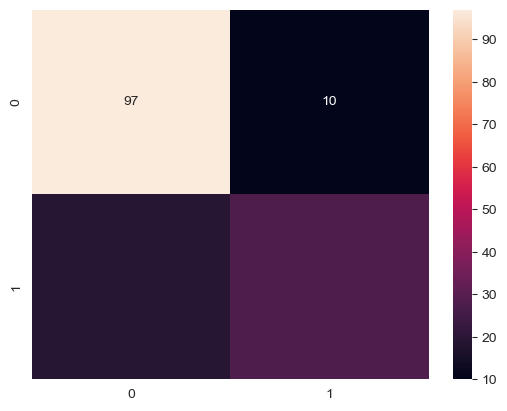

In [131]:
print("Classification Report is:\n",classification_report(y_test,voting_pred))
print("\n F1:\n",f1_score(y_test,voting_pred))
print("\n Precision score is:\n",precision_score(y_test,voting_pred))
print("\n Recall score is:\n",recall_score(y_test,voting_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,voting_pred), annot=True)

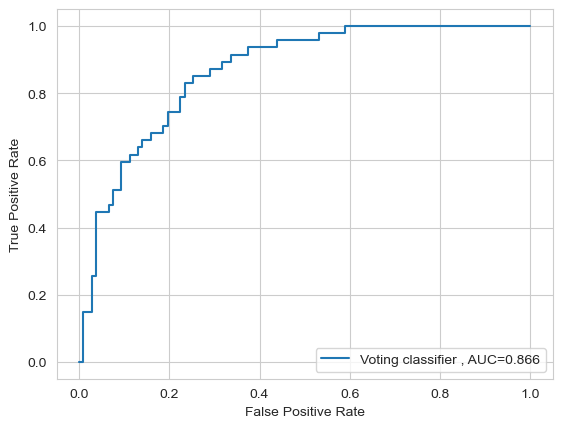

In [137]:
#setting up plotting area
plt.figure(0).clf()

#fit Voting Classifier and plot ROC curve
y_pred = eclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Voting classifier , AUC="+str(auc))

#add legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

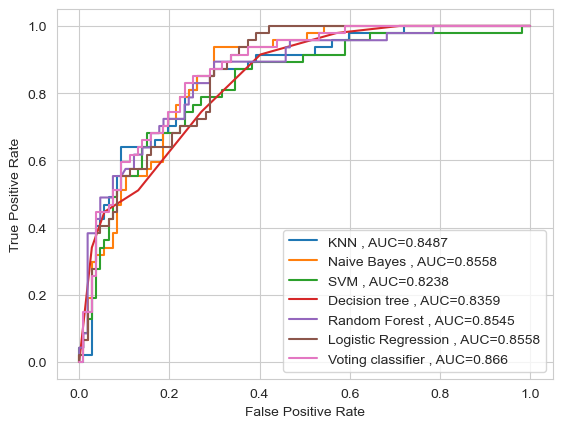

In [142]:
#setting up plotting area
plt.figure(0).clf()

#fit KNN and plot ROC curve
y_pred = best_model_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN , AUC="+str(auc))

#fit Naive Byes and plot ROC curve
y_pred = best_model_naive.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes , AUC="+str(auc))

#fit SVM and plot ROC curve
y_pred = svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVM , AUC="+str(auc))

#fit decision tree and plot ROC curve
y_pred = best_model_dec_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision tree , AUC="+str(auc))

#fit Random Forest and plot ROC curve
y_pred = best_model_random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(auc))

#fit Logistic Regression and plot ROC curve
y_pred = reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression , AUC="+str(auc))

#fit Voting Classifier and plot ROC curve
y_pred = eclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Voting classifier , AUC="+str(auc))

#add legend
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

In [149]:

import pickle
 
#saving the model
filename = r'C:\Users\DELL\Desktop\New folder\diabeties_voting_model.sav'
pickle.dump(eclf, open(filename, 'wb'))


In [151]:
# loading the saved model
loaded_model = pickle.load(open(r'C:\Users\DELL\Desktop\New folder\diabeties_voting_model.sav', 'rb'))
     

In [156]:
import joblib
joblib.dump(eclf, 'diabeties.sav')


['diabeties.sav']

In [157]:
import joblib
loaded_model = joblib.load('diabeties.sav')

In [153]:
import numpy as np

input_data = (6,148,35,33.6,50)
#input format -->  (Pregnancies,Glucose,SkinThickness,BMI,Age)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
#prediction by voting classifier model.
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1.]
The person is diabetic


In [ ]:
import skops
from skops.io import dump

dump(model, "final_model.skops")


In [ ]:
from skops.io import load
import numpy as np

model = load("final_model.skops")  # This should be a FITTED model

input_data = (6,148,35,33.6,50)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

prediction = model.predict(input_data_as_numpy_array)

if prediction[0] == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")
